In [64]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set(style="darkgrid")

PATH = '/home/st/Documents/Uni/Masterarbeit/Data/2024-02-21_rows.json'

rows = json.load(open(PATH, 'r'))
question_rows = []
all_annotations = []

for row in rows:
    for question in row['questions']:
        new_row = row.copy()
        annotations = [annotation for annotation in question['annotations'] if not annotation['skipped'] and not annotation['archived']]
        new_row['question'] = question['question']
        
        for index, annotation in enumerate(annotations):
            all_annotations.append(annotation)
            new_row[f'answers{index}'] = annotation['answerLines']
            new_row[f'noAnswer{index}'] = annotation['noAnswer']
            new_row[f'user{index}'] = annotation['user']
            
        question_rows.append(new_row)

questions_df = pd.DataFrame(question_rows, columns=['question', 'answers0', 'answers1', 'noAnswer0', 'noAnswer1', 'context', 'city', 'language'])
annotations_df = pd.DataFrame(all_annotations)
annotations_df.head()

,answerLines,poor,noAnswer,skipped,comment,user,created,archived
0,[2],False,False,False,,81adb4c5-22c1-4ae1-8497-f746e8041cd0,2024-02-20T12:40:45.868Z,False
1,[],False,True,False,,2ef98f87-20d3-41d9-8c2d-19ec20a69dd2,2024-02-13T20:59:49.873Z,False
2,"[3, 4, 5, 6, 7]",False,False,False,,ffb094e8-796a-4cc9-8b65-e6bb8dd5ebc5,2024-02-17T20:07:39.347Z,False
3,[1],False,False,False,,edf15548-b98f-48d0-b315-cc17bf18a0e5,2024-02-18T11:51:55.770Z,False
4,"[18, 20]",False,False,False,,f3fef4a9-eaf8-46cb-b630-117c2428b06e,2024-02-21T09:11:47.999Z,False


In [53]:
def print_stats(df, name):
    annotation_0 = df.count().answers0
    annotation_1 = df.count().answers1
    print(f'### {name} ###')
    print(f'Total annotations: {annotation_0 + annotation_1} (single: {annotation_0 - annotation_1} | double: {annotation_1})')
    print('')
    
print_stats(questions_df, 'Total')
print_stats(questions_df[questions_df['language'] == 'de'], 'German')
print_stats(questions_df[questions_df['language'] == 'en'], 'English')

### Total ###
Total annotations: 1991 (single: 675 | double: 658)

### German ###
Total annotations: 1283 (single: 291 | double: 496)

### English ###
Total annotations: 708 (single: 384 | double: 162)


In [54]:
double_annotations_df = questions_df[~questions_df.answers0.isnull() & ~questions_df.answers1.isnull()]


print()
double_annotations_df.head()


,question,answers0,answers1,noAnswer0,noAnswer1,context,city,language
3,Was ist das Motto der Münchner Kammerspiele?,[],"[3, 4, 5, 6, 7]",True,False,Münchner Kammerspiele\nMünchner Kammerspiele\n...,muenchen,de
13,Wo kann man Informationen zu den Aufnahmeverfa...,"[5, 6]",[6],False,False,Berufsschule\nBerufsschule\nDie berufliche Ers...,muenchen,de
15,Welche Angaben sind in der Gehaltsabrechnung o...,"[10, 11, 12, 13, 14, 15, 16, 4, 5, 6, 7, 8, 9]","[10, 11, 12, 13, 14, 15, 16, 4, 5, 9]",False,False,Gehaltsabrechnung\nGehaltsabrechnung\nWenn Sie...,muenchen,de
16,Was ist meist der Auszahlungsbetrag auf der Ge...,[15],"[1, 14, 15, 16]",False,False,Gehaltsabrechnung\nGehaltsabrechnung\nWenn Sie...,muenchen,de
18,Wann stellen Arbeitgeberinnen oder Arbeitgeber...,"[2, 3]","[2, 3]",False,False,Gehaltsabrechnung\nGehaltsabrechnung\nWenn Sie...,muenchen,de


             bin  count    sort
2  (-0.001, 1.0]     25  -0.001
0     (1.0, 5.0]     39   1.000
1    (5.0, 10.0]     28   5.000
3   (10.0, 25.0]     21  10.000
4   (25.0, 50.0]     17  25.000
[Interval(-0.001, 1.0, closed='right'), Interval(1.0, 5.0, closed='right'), Interval(5.0, 10.0, closed='right'), Interval(10.0, 25.0, closed='right'), Interval(25.0, 50.0, closed='right'), Interval(50.0, 100.0, closed='right'), Interval(100.0, 1000.0, closed='right')]


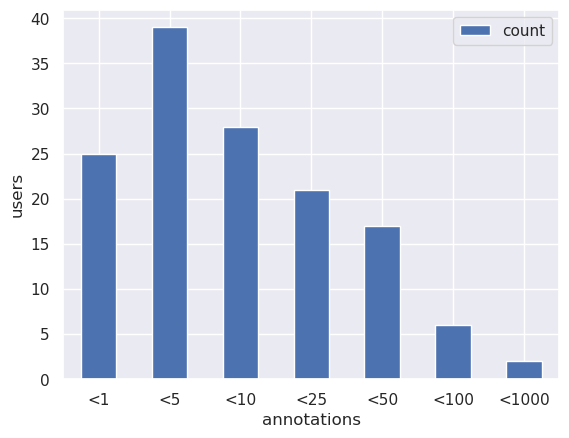

In [107]:
# Plot user contributions
group_by_user = annotations_df.user.value_counts().reset_index()
group_by_user.columns = ['user', 'annotations']
user_count_bins = pd.cut(group_by_user['annotations'], bins=[0, 1, 5, 10, 25, 50, 100, 1000], include_lowest=True).value_counts().reset_index()
user_count_bins.columns = ['bin', 'count']
user_count_bins['sort'] = user_count_bins.bin.map(lambda x : x.left)
user_count_bins = user_count_bins.sort_values('sort')
print(user_count_bins.head())

ax = user_count_bins.plot.bar(rot=0, color='b')
print([ x for x in user_count_bins['bin']])
labels = [f'<{round(bin.right)}' for bin in user_count_bins['bin']]
ax.set_xticklabels([label for label in labels if label ])
plt.xlabel('annotations')
plt.ylabel('users')
plt.show()